In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

2024-02-05 18:34:21.315324: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-05 18:34:21.356503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-05 18:34:21.952853: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
directory_path = parent_dir / 'uncropped_data'
import swallowing_recognition

In [3]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [4]:
path = directory_path / '20240205' / 'tsuji_20data.wav'
wav1 = long_audio.Long_audio(path)
wav1.print()

163.84
23
[144703, 338240, 564095, 813436, 1021769, 1236162, 1490528, 1732768, 1938941, 2164776, 2386776, 2608007, 2852123, 2903551, 3059548, 3275358, 3512131, 3728935, 3987731, 4163962, 4314882, 4384892, 4597268]
[174325, 394343, 655119, 842440, 1080451, 1340524, 1544790, 1765205, 1971655, 2206046, 2417656, 2671884, 2890124, 2936050, 3113912, 3308738, 3586226, 3767055, 4030917, 4271243, 4320484, 4484359, 4619956]


163.84
27
[73109, 396335, 446140, 650552, 752662, 873283, 976715, 1083408, 1304349, 1326699, 1536436, 1584484, 1770200, 1983995, 2189323, 2436637, 2684161, 2881457, 3003712, 3091864, 3312705, 3547090, 3777360, 3978754, 4208878, 4431930, 4591726]
[85095, 433371, 455071, 725435, 758872, 902546, 984131, 1107994, 1310546, 1339991, 1557624, 1587004, 1804409, 1993995, 2209036, 2479532, 2708112, 2963941, 3013933, 3109493, 3326289, 3569105, 3822300, 4028838, 4221412, 4549970, 4600683]


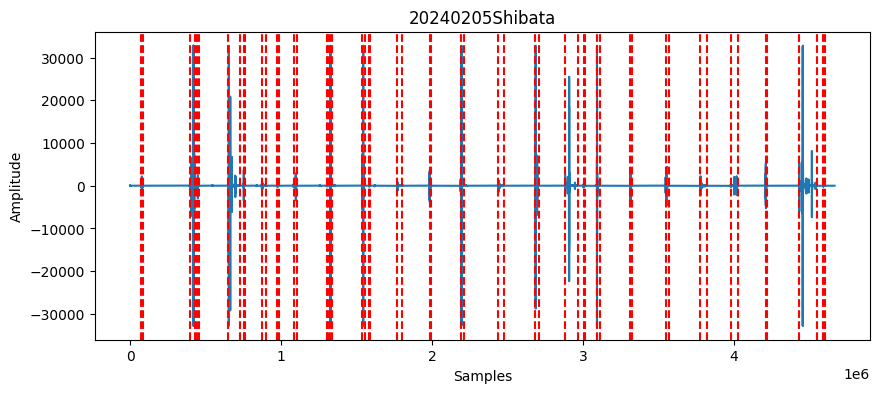

/home/s2/Desktop/washino/swallowing-recognize


In [5]:
wav1 = long_audio.Long_audio(path)
wav1.print()
wav1.plot("20240205Shibata")
current_path = path.parent.parent.parent
print(current_path)

In [6]:
model_path = current_path / 'ipynb_swallowing' / '20240205_binary_ep50_bs32.keras'
print(model_path)
wav1.predict(model_path, 2)

/home/s2/Desktop/washino/swallowing-recognize/ipynb_swallowing/20240205_binary_ep50_bs32.keras


2024-02-05 18:24:06.046195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22052 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


(27, 224, 224, 3)


2024-02-05 18:24:16.902124: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-02-05 18:24:17.097656: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 2s 2s/step
Predicted classes: [0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1]


In [7]:
wav1.save_plots_to_pdf('20240205Shibata.pdf')